# Importing the required Libraries

In [1]:
# Importing libraries used for handling download and file management
import requests
import os
import shutil

# Importing libraries used for Data manipulation and analysis
import pandas as pd
import numpy as np

# Importing libraries used for creating data visualizations and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset into a dataframe


To ensure organized data management, it is essential to store data in a designated subfolder. My data is stored in a folder named `data.` You can easily access and download the data from the following link: [Data Download Link](https://drive.google.com/file/d/1SPy58Kmwe3NrXwyFTS4wJYs2pBN_4nrS/view).

**Note:** The data is stored in a zip file and will need to be unzipped before use.

This structured approach not only promotes efficient data handling but also facilitates easy retrieval and sharing when needed.

The data includes:

Variable       | Definition
---------------|-----------
RowNumber      | RowNumber used for identification
CustomerId     | A unique Identifier
Surname        | Surname of the customer
CreditScore    | Credit score of the customer
Geography      | Geographic region of the customer
Gender         | Gender of the customer
Age            | Age of the customer in years
Tenure         | Time spent with bank.
Balance        | Amount of money in the customer's account balance
NumOfProducts  | Number of products purchased by the customer
HasCrCard      | An integer representing if the customer received a credit card
IsActiveMember | An integer representing the activeness of customer
EstimatedSalary| The estimated salary of customer
Exited         | An integer representing if the customer has churned

In [2]:
def download_file(url, destination):
    response = requests.get(url, stream=True)
    parent_dir = "/".join(destination.split("/")[:-1])
    if not os.path.isdir(parent_dir):
      os.mkdir(parent_dir)
    if response.status_code == 200 and not os.path.isfile(destination):
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"File downloaded to {destination}")
    elif os.path.isfile(destination):
        print(f"File already downloaded")
    else:
        print(f"Failed to download the file")
    return parent_dir

def unzip_file(zip_file_path, extract_to_path):
    try:
        shutil.unpack_archive(zip_file_path, extract_to_path)
        print(f"Successfully extracted files from {zip_file_path}")
    except FileNotFoundError:
        print(f"Error: The ZIP file {zip_file_path} does not exist.")
    except shutil.ReadError:
        print(f"Error: {zip_file_path} is not a valid ZIP archive.")


In [3]:
# To download the file directly from the web.
download = True

if download:
    url = "https://drive.google.com/u/0/uc?id=1SPy58Kmwe3NrXwyFTS4wJYs2pBN_4nrS&export=download"
    destination = "./data/Bank Customer Churn Prediction.zip"

    data_directory = download_file(url, destination)


    unzip_file(destination, data_directory)

Churn = pd.read_csv("./data/Churn_Modelling.csv")

File downloaded to ./data/Bank Customer Churn Prediction.zip
Successfully extracted files from ./data/Bank Customer Churn Prediction.zip


# Data Exploration
First let's look at the **First 5 rows** of our dataframe.

In [4]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Then let's look at the **Last 5 rows** of the DataFrame

In [5]:
Churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Let's have a look at some general information on the table.

In [6]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset doesn't seem to have any missing values. Asides that all the columns appear to be in their correct datatypes which is great!<br>
Now, let's check for redundancies in the dataset<br>

In [7]:
# Checking for redundant rows by counting the number of duplicated rows in the Dataset.
print(sum(Churn.duplicated()), "redundant rows")

# Checking for redundant columns by counting the number of duplicated columns in the dataframe.
print(sum(Churn.T.duplicated()), "redundant columns")

0 redundant rows
0 redundant columns


Our dataset has no redundant row and columns<br>

Let's generate a statistical summary of the columns in the dataframe to better understand our data.

In [8]:
# Generating a statistical summary of the numerical columns in the dataset
Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Generate a statistical summary of the non-numerical columns in the dataset
Churn.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


This statistical summary provides a good sense of the dataset. Additionally, this table highlights the need to investigate specific columns like CustomerId and RowNumber as they seem not to be any value as they are used for identification.


In [10]:
# Assessing the diversity of values within the dataframe's columns.
Unique_columns = []

# Iterating through each column in the DataFrame.
for column in Churn.columns:
    # Check if every value in the column is unique.
    if Churn[column].value_counts().values[0] == 1:
        Unique_columns.append(column)
        print("The column", column, "consists of entirely unique values.")
    else:
        continue


The column RowNumber consists of entirely unique values.
The column CustomerId consists of entirely unique values.


The CustomerId and RowNumber columns have unique values that are like name tags, but they don't help our model make predictions. It makes sense to take them out of our data because they don't give us useful information. This can make our modeling work better and more streamlined.

# Data Cleaning
During our data exploration, I noticed an area in the dataset that require careful editing,  and that is the removal of redundant rows and columns.<br> Now let's get to it

In [11]:
# Removing the CustomerId and RowNumber from the dataset
if Unique_columns:
    Churn = Churn.drop(columns=Unique_columns)
Churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's also get rid of the surname as it is yet another identifier and won't benefit our model

In [12]:
Churn = Churn.drop(columns="Surname")
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Upon closer inspection, I noticed some discrepancies, specifically regarding how a user can be marked as "active" and still be categorized as "churned." This is most likely an error that needs to be addressed and corrected to facilitate more accurate predictions.

In [13]:
Churn.loc[(Churn['IsActiveMember'] == 1) & (Churn['Exited'] == 1), 'IsActiveMember'] = 0

Let's Check if the change has been implemented.

In [14]:
Churn.query("IsActiveMember==1 & Exited==1")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Now that we are done with that let's get to plot some graphs to help us better understand our data

# Data Visualization
 Let's first create a function for the labelling of our graphs

In [15]:
def labelling(data, text=True, save=False, figsize=(6, 4), dpi=120, kind="bar", title="", y="", x=''):
    plt.figure(figsize=figsize, dpi=dpi)
    data.plot(kind=kind)
    plt.title(title.title())
    plt.ylabel(y.title())
    plt.xlabel(x.title())
    if text:
        for index, value in enumerate(data):
            plt.text(index, value, str(value), ha='center', va='bottom')
    if save:
        plt.savefig('./viz/sample_plot_1.png', dpi=300, bbox_inches='tight')


First let's examine the distribution of the credit Score of all customers

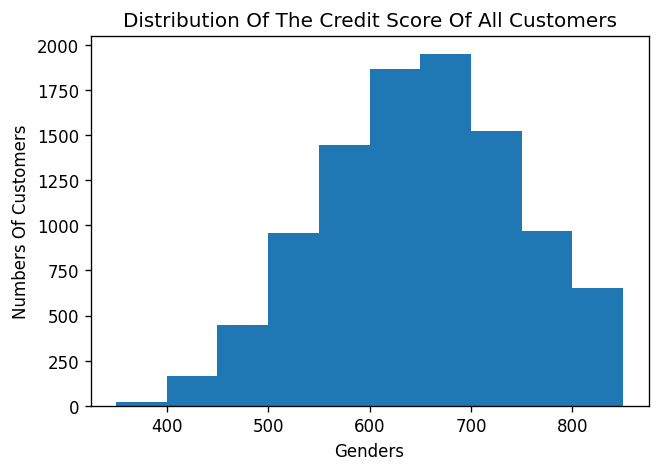

In [16]:
labelling(Churn.CreditScore, kind='hist', title="distribution of the Credit Score of all customers", y = "Numbers of customers", x="Genders", text=False);

Based on the graph above, we can observe that the majority of customers fall within the credit score range of 400 to 850. This range is considered ideal.



Now let's examine the distribution of customers across genders.

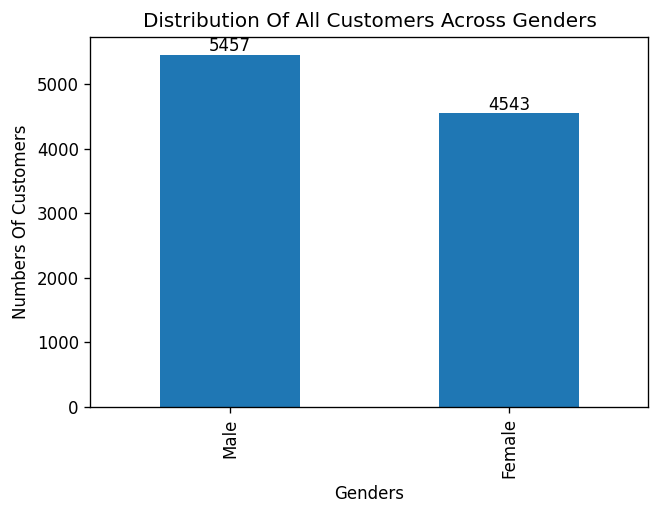

In [17]:
# plotting the graph
v = Churn.Gender.value_counts()
labelling(v, title="distribution of all customers across genders", y = "Numbers of customers", x="Genders");

It's evident from the graph that the company has had more male users than female users. This observation indicates that there is a notable difference in the number of male and female customers within the dataset. This insight helps in assessing the gender-related trends and patterns, which can be valuable for making data-driven decisions and performing further analyses based on gender demographics.

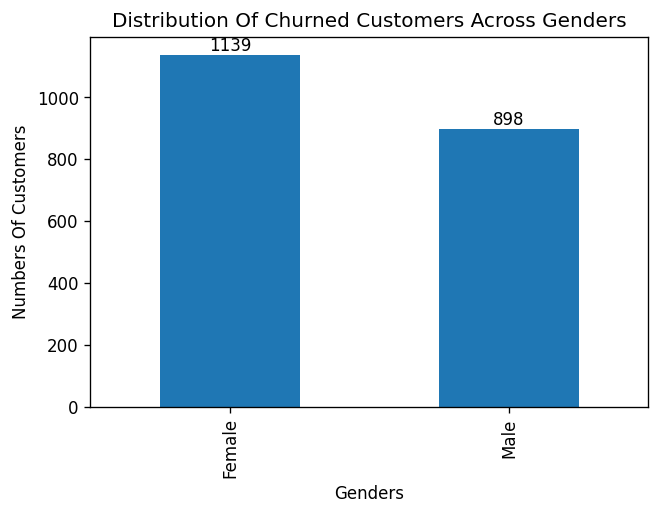

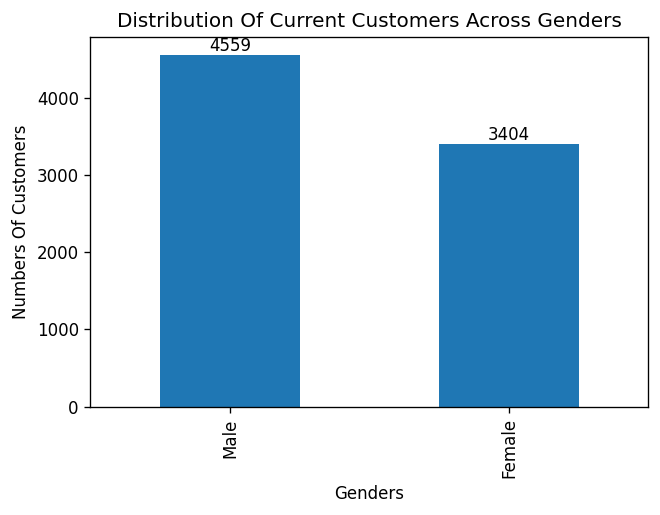

In [18]:
# plotting the graph
v = Churn.query("Exited==1").Gender.value_counts()
labelling(v, title="distribution of churned customers across genders", y = "Numbers of customers", x="Genders");

# plotting the graph
v = Churn.query("Exited==0").Gender.value_counts()
labelling(v, title="distribution of current customers across genders", y = "Numbers of customers", x="Genders");

In both cases the number of male users surpasses the number of female users. This gender imbalance can have important implications for data analysis and modeling. When working with imbalanced datasets, it's crucial to engage in careful feature engineering.

Let's now shift our focus to the distribution of user ages. Understanding the age distribution can provide valuable insights into the user base.

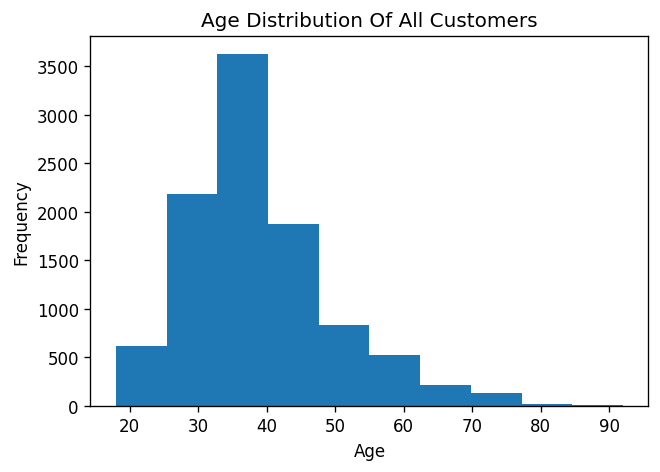

In [19]:
labelling(Churn.Age,kind='hist', title="Age distribution of all customers", y = "Frequency", x="Age", text=False);

From the graph presented above, a clear trend emerges. The graph exhibits a right-skewed distribution, indicating that the majority of users fall into the category of young people, typically under the age of 50. This skewness suggests that the service is more popular among a younger demographic.

Now, let's delve deeper into the data by exploring the age distribution among customers who have churned and those who haven't.

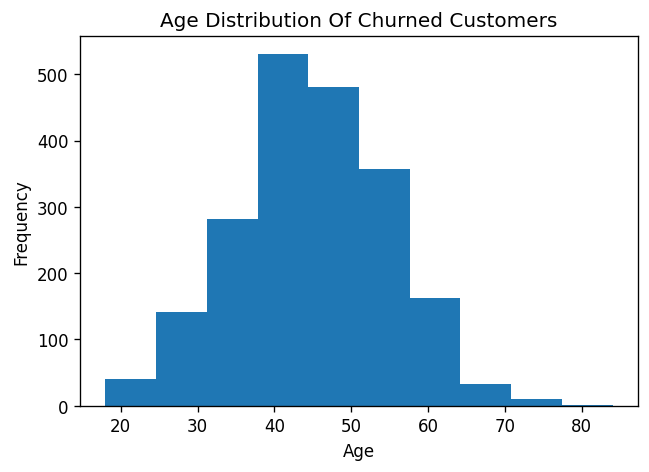

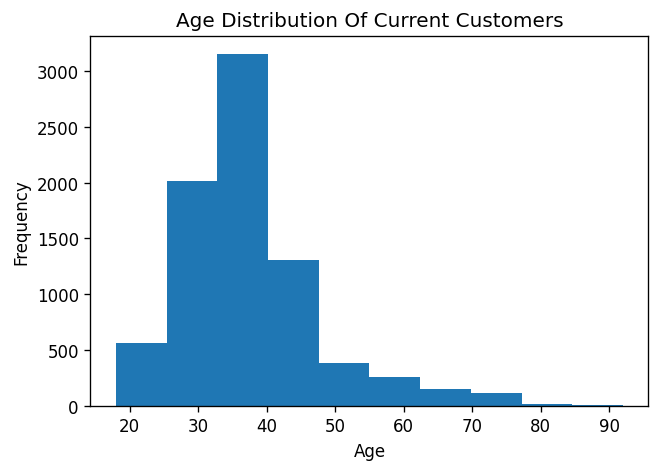

In [20]:
labelling(Churn.query('Exited==1').Age,kind='hist', title="Age distribution of churned customers", y = "Frequency", x="Age",
          text=False);
labelling(Churn.query('Exited==0').Age,kind='hist', title="Age distribution of current customers", y = "Frequency", x="Age",
          text=False);

The first graph exhibits a slight right skew. This skew indicates that the majority of users who have churned fall into the younger age brackets, particularly those below the age of 60. In other words, there is a higher concentration of churned users in the younger age groups.

The second graph also displays a right skew, implying that most of the current users are young.This skew suggests that the company may be experiencing higher churn rates among its younger user base.

Understanding the reasons behind these trends and implementing targeted retention strategies for younger users may be essential to reduce churn and increasing user satisfaction.



In [21]:
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,0,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now, let's move forward with the task of distributing our customers into various groups based on their account balances. By understanding the distribution of account balances, we can make informed decisions about offering tailored financial products or services.

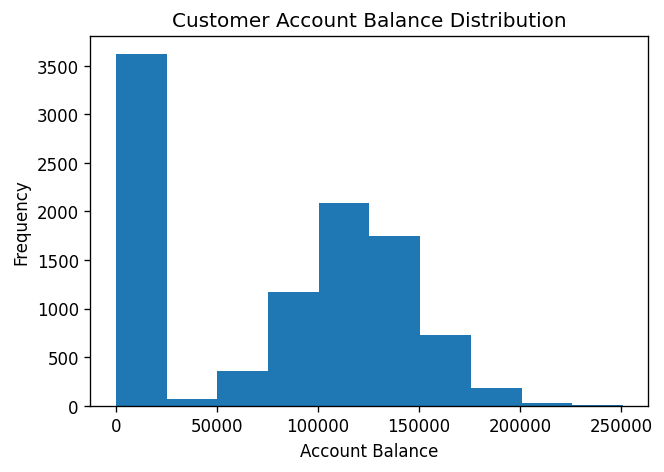

In [22]:
labelling(Churn.Balance,kind='hist', title="Customer Account Balance Distribution", y = "Frequency", x="Account Balance",
          text=False);

The graph exhibits a bimodal distribution, which means it has two distinct peaks. Further investigation is needed to understand the underlying factors causing this bimodal pattern. Therefore to gain deeper insights and take actionable steps, I suggest segmenting the customer bases into groups; low-paying and high-paying customers.

In [23]:
Average_balance = Churn.Balance.sum()//10000

# segmenting users based on average account balance
Churn["High_Payer"] = Churn.Balance > Average_balance
Churn["High_Payer"] = Churn["High_Payer"].apply(int)
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,High_Payer
0,619,France,Female,42,2,0.00,1,1,0,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


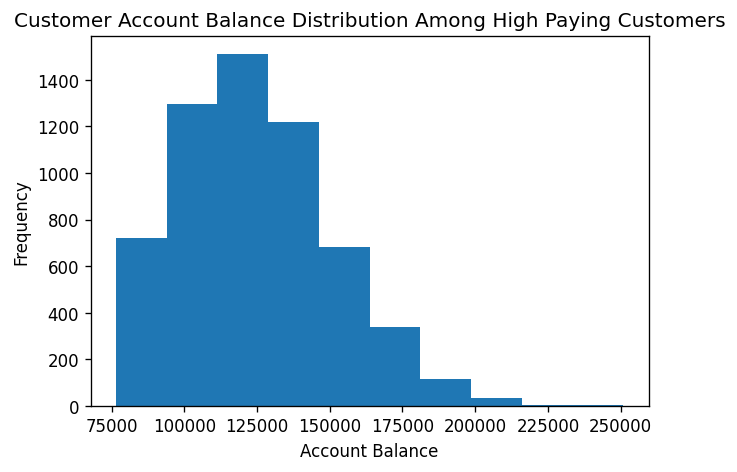

In [24]:
labelling(Churn.query('High_Payer == 1').Balance, kind='hist', title="Customer Account Balance Distribution Among High Paying Customers", y = "Frequency",
          x="Account Balance", text=False);

From the graph above, it is evident that a significant portion of our customers falls into the high-paying category. On average, high-paying customers are spending approximately between 75,000 to 175,000 units of currency on the services. There are a few outliers in this segment, indicating that some customers are have exceptionally high balances.

While we've discussed high-paying customers, it's essential to also analyze and understand the lower-paying customer segment. Let's shift our attention to the lower-paying customers to gain insights into their spending behavior and preferences. Analyzing this segment can help us identify potential areas for improvement, tailor our offerings, or implement strategies to increase their spending.







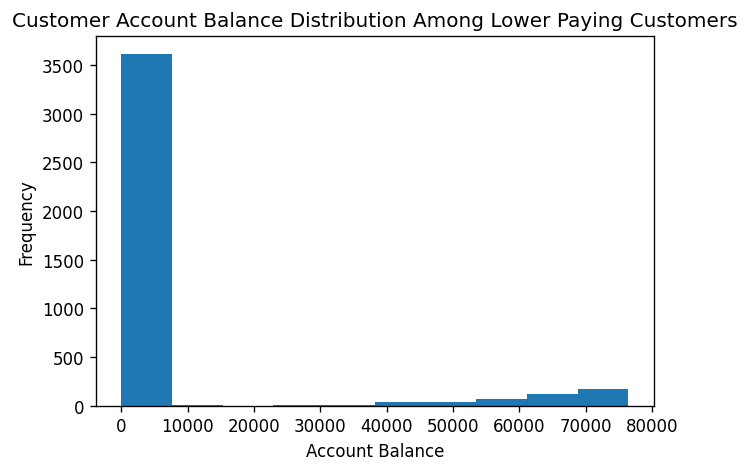

In [25]:
labelling(Churn.query('High_Payer == 0').Balance, kind='hist', title="Customer Account Balance Distribution Among lower Paying Customers", y = "Frequency",
          x="Account Balance", text=False);

The account balance distribution analysis reveals significant disparities between lower-paying and higher-paying customers. When examining the distribution of account balances, it becomes evident that the two customer groups exhibit markedly different patterns. The graph above displays a pronounced right skew. This indicates that a considerable portion of customers within this category have relatively lower account balances, while only a minority possess significantly higher balances.
Among the lower-paying customer group, 3500 individuals maintain account balances below $10,000. This particular subgroup represents a crucial segment of our customer base, as their spending patterns significantly influence the overall distribution.

Understanding the underlying reasons behind these distribution trends is vital. Recognizing the disparities in account balances allows the bank to tailor marketing strategies specifically to the lower-paying customer segment. By addressing their unique needs and preferences, we can potentially encourage increased spending and engagement.

Let's now have a look at the distribution of account balance of customers across different geographical regions.

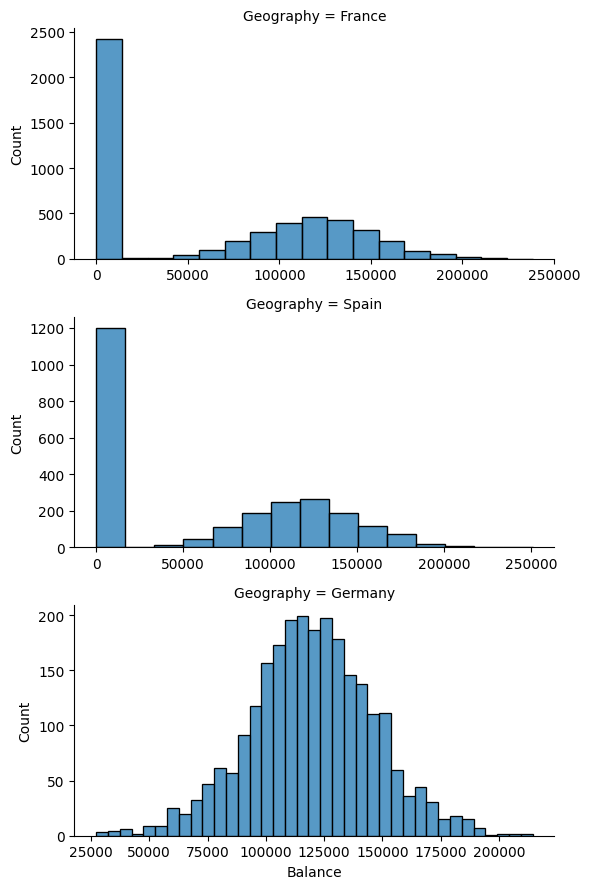

In [26]:
g = sns.FacetGrid(Churn, row="Geography", sharex=False, sharey=False, aspect=2)
g.map(sns.histplot, "Balance")

The first two graphs,showing the distribution of account balances of the customers in the geographic regions of France and Spain, exhibit a bimodal distribution. These bimodal characteristics resemble patterns that have been discussed or identified earlier in the analysis. In contrast, the third graph which shows the distribution of account balances of the customers in the region of Germany  portrays a uniform distribution. This indicates that most, if not all, customers have account balances above zero.

The insight provides guidance on how to customize or adapt marketing strategies.

**Recommendation:**

To increase customer spending, we should tailor marketing strategies to these regions as it will not only maximize the impact of marketing efforts but also reach into previously untapped regions.

Let's examine the distribution of the number of products purchased by customers.

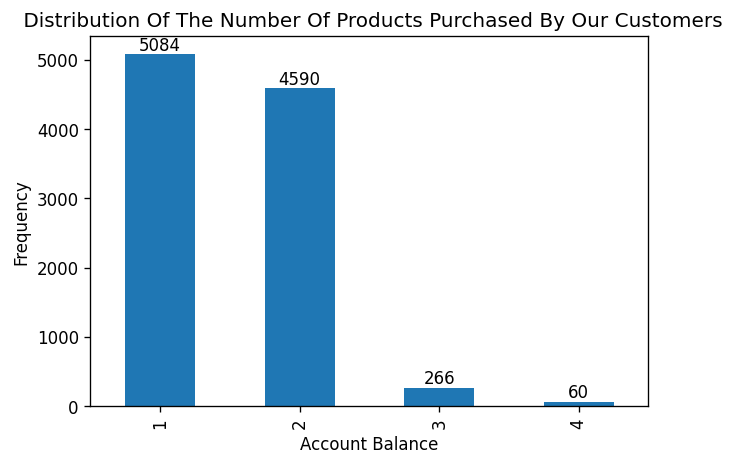

In [27]:
labelling(Churn.NumOfProducts.value_counts(), kind='bar', title=" Distribution of the number of products purchased by our customers", y = "Frequency",
          x="Account Balance", text=True);

From the graph above, we can observe customers' spending habits. The majority of users have purchased no more than 2 products, while a very small minority have purchased more than 2 products.

Now, let's take a brief look at the Tenure, HasCrCard, and IsActiveMember columns to uncover additional insights.

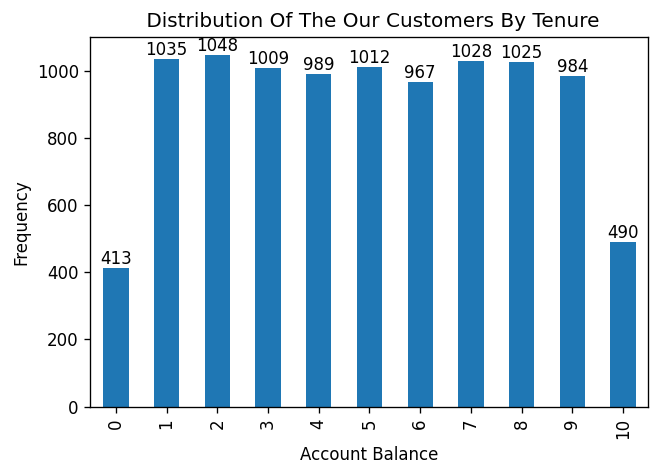

In [28]:
labelling(Churn.Tenure.value_counts().sort_index(), kind='bar', title=" Distribution of the our customers by Tenure", y = "Frequency",
          x="Account Balance", text=True)

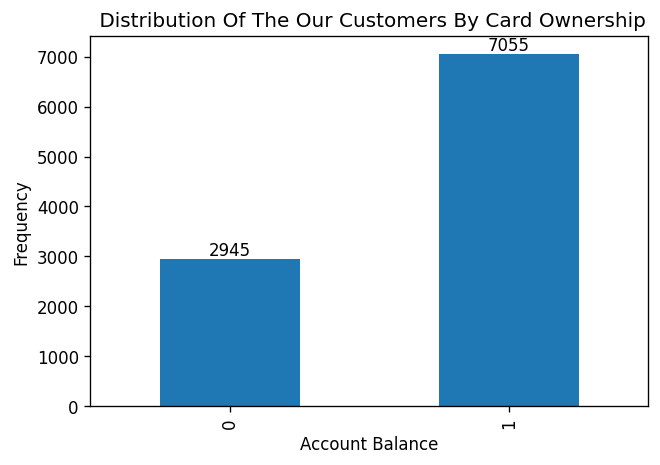

In [29]:
labelling(Churn.HasCrCard.value_counts().sort_index(), kind='bar', title=" Distribution of the our customers by Card ownership",
          y = "Frequency", x="Account Balance", text=True)

Based on the data represented in the graph, it is evident that approximately 70% of customers possess credit cards. This insight provides us with an opportunity to optimize marketing efforts.

**Recommendation:**

To enhance customer engagement and minimize the number of customers without credit cards, we can strategically focus on marketing campaigns that incentivize customers to collect their credit cards. By doing so, we can expect to see a positive impact on the customer base and overall business performance.

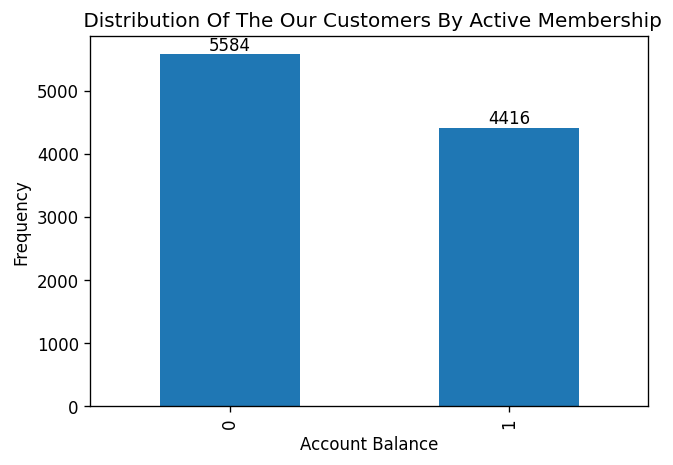

In [30]:
labelling(Churn.IsActiveMember.value_counts().sort_index(), kind='bar', title=" Distribution of the our customers by active membership",
          y = "Frequency", x="Account Balance", text=True)

The graph above illustrates that the number of inactive customers has overtaken the number of active customers. This situation is not ideal for the bank.

**Recommendation**

To improve our business, I recommend focusing marketing strategies on addressing this issue.

Now let's have a look at the dataframe and how all the columns correlate to our target variable


In [31]:
Churn.corr()

<ipython-input-31-e5aa49079d13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Churn.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,High_Payer
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.033904,-0.001384,-0.027094,0.008324
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.003578,-0.007201,0.285323,0.029351
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.017096,0.007784,-0.014001,-0.017713
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.045340,0.012797,0.118533,0.923846
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.008530,0.014204,-0.047820,-0.301287
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,0.004202,-0.009933,-0.007138,-0.023593
IsActiveMember,0.033904,0.003578,-0.017096,-0.045340,0.008530,0.004202,1.000000,-0.012946,-0.449779,-0.045002
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.012946,1.000000,0.012097,0.013113
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.449779,0.012097,1.000000,0.111294
High_Payer,0.008324,0.029351,-0.017713,0.923846,-0.301287,-0.023593,-0.045002,0.013113,0.111294,1.000000


In the current analysis, it has been observed that most of the columns exhibit weak correlations with the target variable. This finding suggests that preprocessing steps may be necessary to enhance the relationship between the features and the target. These preprocessing techniques and strategies will be addressed in the upcoming notebook.

# Conclusion
In conclusion, our analysis has yielded valuable insights into the dataset and its relationship with the target variable. We have uncovered the following key findings:

1. **Demographics:** A substantial portion of our customer base comprises young individuals. These demographics should inform our marketing strategies, catering to the preferences and behaviors of this youthful audience.

2. **Customer Engagement:** It is notable that many of our customers appear to be inactive. To revitalize engagement, our marketing strategies should explore methods to incentivize their return.

3. **Empty Balances:** Surprisingly, over a third of our customer base maintains empty balances. Investigating the underlying reasons for this phenomenon through surveys and user feedback collection is crucial to address this issue effectively.

4. **Correlations:** Furthermore, our analysis has revealed that a significant portion of the dataset's columns exhibit weak correlations with the target variable. This indicates the need for additional data preprocessing and feature engineering to improve model performance.

In summary, this analysis marks a pivotal milestone in our data-driven journey. It sets the stage for more comprehensive exploration and the development of advanced models to further our understanding of our customer base and enhance our decision-making processes.

# Limitation
Despite the valuable insights we have gained from our analysis regarding the dataset's relationship with the target variable, there are notable areas that require enhancement:

1. The dataset is missing crucial columns that could provide deeper insights into user behavior, including reasons for churn.

2. We have identified imbalances within the dataset, both in terms of churned versus unchurned customers and the distribution of male and female customers.

# Saving of Cleaned Dataframe

In [32]:
Churn.to_csv("./data/Cleaned_Churn_Modelling.csv", index=False)